## 基本数据类型操作

sess.run()的第一个参数是一般是[optimizer, cost]，这样返回值也是optimizer, cost的结果，相当于有几个参数就返回几个

In [1]:
import tensorflow as tf

In [2]:
#常量数据
a = tf.constant(2)
b = tf.constant(3)

In [4]:
# Launch the default graph.
with tf.Session() as sess:
    print('a={}, b={}'.format(sess.run(a), sess.run(b)))
    print('Addition with constants: {}'.format(sess.run(a+b)))

a=2, b=3
Addition with constants: 5


In [6]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
#类似初始化一个变量，指定类型，但不赋值，而是通过feed_dict传入值
#可以把它看成一个神经节点对象，节点的数值里保存了其值，在训练过程中其值会更新，但初始值一定要通过feedfeed_dict传入
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [9]:
tf.placeholder??

In [8]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)
with tf.Session() as sess:
    print('Addition with variables :{}'.format(sess.run(add, feed_dict={a:5, b:6})))

Addition with variables :11


## Eager API（实时执行，不通过tf.Session()）

In [1]:
from __future__ import absolute_import, division, print_function

import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
print("Setting Eager mode...")
tf.enable_eager_execution()
tfe = tf.contrib.eager

Setting Eager mode...

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
# Define constant tensors
print("Define constant tensors")
a = tf.constant(2)
print("a = %i" % a)
b = tf.constant(3)
print("b = %i" % b)

Define constant tensors
a = 2
b = 3


In [4]:
# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")
c = a + b
print("a + b = %i" % c)
d = a * b
print("a * b = %i" % d)

Running operations, without tf.Session
a + b = 5
a * b = 6


In [8]:
# Full compatibility with Numpy
print("Mixing operations with Tensors and Numpy Arrays")

# Define constant tensors
a = tf.constant([[2., 1.],
                 [1., 0.]], dtype=tf.float32)
print("Tensor:\n a = %s" % a)
b = np.array([[3., 0.],
              [5., 1.]], dtype=np.float32)
print("NumpyArray:\n b = %s" % b)


Mixing operations with Tensors and Numpy Arrays
Tensor:
 a = tf.Tensor(
[[2. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)
NumpyArray:
 b = [[3. 0.]
 [5. 1.]]


In [9]:
# Run the operation without the need for tf.Session
print("Running operations, without tf.Session")
c = a + b
print("a + b = %s" % c)

d = tf.matmul(a, b)
print("a * b = %s" % d)

Running operations, without tf.Session
a + b = tf.Tensor(
[[5. 1.]
 [6. 1.]], shape=(2, 2), dtype=float32)
a * b = tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


## Basic Model 

### Linear Regression 

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights 
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Construct a linear model y = w*x +b
pred = tf.add(tf.multiply(X, W), b)
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


Epoch: 0050 cost= 0.113766648 W= 0.35692215 b= 0.029352799
Epoch: 0100 cost= 0.109513290 W= 0.35053873 b= 0.07527407
Epoch: 0150 cost= 0.105751358 W= 0.34453505 b= 0.11846421
Epoch: 0200 cost= 0.102424122 W= 0.33888835 b= 0.15908578
Epoch: 0250 cost= 0.099481337 W= 0.3335776 b= 0.19729121
Epoch: 0300 cost= 0.096878655 W= 0.3285827 b= 0.2332243
Epoch: 0350 cost= 0.094576731 W= 0.32388487 b= 0.26702031
Epoch: 0400 cost= 0.092540920 W= 0.3194664 b= 0.29880637
Epoch: 0450 cost= 0.090740405 W= 0.31531072 b= 0.32870182
Epoch: 0500 cost= 0.089148037 W= 0.31140226 b= 0.35681942
Epoch: 0550 cost= 0.087739773 W= 0.30772623 b= 0.38326493
Epoch: 0600 cost= 0.086494327 W= 0.30426875 b= 0.40813756
Epoch: 0650 cost= 0.085392959 W= 0.30101702 b= 0.43153027
Epoch: 0700 cost= 0.084418960 W= 0.2979585 b= 0.45353207
Epoch: 0750 cost= 0.083557606 W= 0.295082 b= 0.47422576
Epoch: 0800 cost= 0.082795888 W= 0.2923766 b= 0.49368873
Epoch: 0850 cost= 0.082122356 W= 0.28983212 b= 0.5119932
Epoch: 0900 cost= 0.08

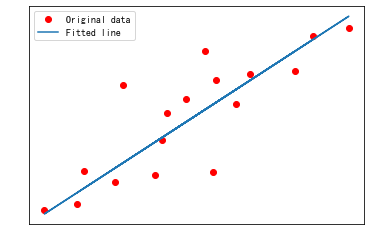

In [7]:
with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Logistic Regression

MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![overview](https://camo.githubusercontent.com/b06741b45df8ffe29c7de999ab2ec4ff6b2965ba/687474703a2f2f6e657572616c6e6574776f726b73616e64646565706c6561726e696e672e636f6d2f696d616765732f6d6e6973745f3130305f6469676974732e706e67)

More info: http://yann.lecun.com/exdb/mnist/

In [8]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
data_path = 'E:/MYGIT/DataSources/MNIST/'
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

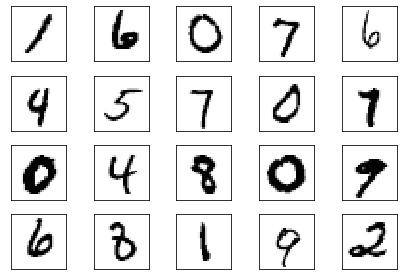

In [15]:
#display dataset image
#load data
train_X = mnist.train.images                #训练集样本
validation_X = mnist.validation.images      #验证集样本
test_X = mnist.test.images                  #测试集样本
#labels
train_Y = mnist.train.labels                #训练集标签
validation_Y = mnist.validation.labels      #验证集标签
test_Y = mnist.test.labels                  #测试集标签

fig, ax = plt.subplots(nrows=4,ncols=5,sharex='all',sharey='all') #20个子图
ax = ax.flatten()
for i in range(20):
    img = train_X[i].reshape(28, 28)
    ax[i].imshow(img,cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [14]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            #sess.run()
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 1.183618286
Epoch: 0002 cost= 0.665190355
Epoch: 0003 cost= 0.552808906
Epoch: 0004 cost= 0.498638095
Epoch: 0005 cost= 0.465468787
Epoch: 0006 cost= 0.442572292
Epoch: 0007 cost= 0.425502479
Epoch: 0008 cost= 0.412154034
Epoch: 0009 cost= 0.401330161
Epoch: 0010 cost= 0.392397824
Epoch: 0011 cost= 0.384679402
Epoch: 0012 cost= 0.378195118
Epoch: 0013 cost= 0.372391337
Epoch: 0014 cost= 0.367303040
Epoch: 0015 cost= 0.362743215
Epoch: 0016 cost= 0.358623285
Epoch: 0017 cost= 0.354832501
Epoch: 0018 cost= 0.351446068
Epoch: 0019 cost= 0.348296994
Epoch: 0020 cost= 0.345425053
Epoch: 0021 cost= 0.342743633
Epoch: 0022 cost= 0.340253351
Epoch: 0023 cost= 0.337906931
Epoch: 0024 cost= 0.335725858
Epoch: 0025 cost= 0.333722814
Optimization Finished!
Accuracy: 0.8886667


### Nearest Neighbor

In [ ]:
import tensorflow as tf
# Import MINST data
data_path = 'E:/MYGIT/DataSources/MNIST/'
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(data_path, one_hot=True)

In [16]:
import numpy as np

In [30]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

#tf.negative()
# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
#distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
#L2 Distance
distance = tf.reduce_sum(tf.square(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.argmin(distance, 0)

accuracy = 0.
# Initialize the variables (i.e. assign their default value)

In [31]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Test 0 Prediction: 2 True Class: 2
Test 1 Prediction: 2 True Class: 2
Test 2 Prediction: 3 True Class: 3
Test 3 Prediction: 7 True Class: 7
Test 4 Prediction: 3 True Class: 3
Test 5 Prediction: 7 True Class: 7
Test 6 Prediction: 7 True Class: 7
Test 7 Prediction: 3 True Class: 3
Test 8 Prediction: 0 True Class: 0
Test 9 Prediction: 5 True Class: 5
Test 10 Prediction: 2 True Class: 2
Test 11 Prediction: 7 True Class: 7
Test 12 Prediction: 1 True Class: 1
Test 13 Prediction: 7 True Class: 7
Test 14 Prediction: 1 True Class: 1
Test 15 Prediction: 9 True Class: 9
Test 16 Prediction: 0 True Class: 0
Test 17 Prediction: 6 True Class: 6
Test 18 Prediction: 5 True Class: 5
Test 19 Prediction: 7 True Class: 7
Test 20 Prediction: 8 True Class: 8
Test 21 Prediction: 0 True Class: 0
Test 22 Prediction: 0 True Class: 0
Test 23 Prediction: 2 True Class: 2
Test 24 Prediction: 6 True Class: 6
Test 25 Prediction: 5 True Class: 5
Test 26 Prediction: 0 True Class: 0
Test 27 Prediction: 0 True Class: 0
Te

## Nerual Network Model

In [ ]:
from __future__ import print_function
import tensorflow as tf

In [ ]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
data_path = 'E:/MYGIT/DataSources/MNIST/'
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

In [36]:
train_X = mnist.train.images                #训练集样本
validation_X = mnist.validation.images      #验证集样本
test_X = mnist.test.images                  #测试集样本
#labels
train_Y = mnist.train.labels                #训练集标签
validation_Y = mnist.validation.labels      #验证集标签
test_Y = mnist.test.labels                  #测试集标签

batch_size = 128
num_hidden_nodes = 1024
image_size = 28
num_labels = 10
graph = tf.Graph()

with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(validation_X)
    tf_test_dataset = tf.constant(test_X)

    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_hidden_nodes]))##隐藏层1024个节点
    biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    
    weights2 = tf.Variable(tf.truncated_normal([num_hidden_nodes, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.##设置神经网络tf.nn.relu()里的参数相当于逻辑回归的函数logits
    lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    logits = tf.matmul(lay1_train, weights2) + biases2
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf_train_labels, logits=logits))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    
    lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1) 
    valid_prediction = tf.nn.softmax(tf.matmul(lay1_valid, weights2) + biases2)
    
    lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_prediction = tf.nn.softmax(tf.matmul(lay1_test, weights2) + biases2)

In [43]:
print(train_X.shape)
print(train_Y.shape)

(55000, 784)
(55000, 10)


In [46]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

num_steps = 500
##3001*128 总共的训练数据   ## 之前是801*10000
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        ##分母减去batch_size是防止当batch_size不能被训练数据量整除时，offset:(offset + batch_size)超出数组界限
        offset = (step * batch_size) % (train_Y.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_X[offset:(offset + batch_size), :]
        batch_labels = train_Y[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 50 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), validation_Y))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_Y))

Initialized
Minibatch loss at step 0: 212.356537
Minibatch accuracy: 10.2%
Validation accuracy: 12.0%
Minibatch loss at step 50: 14.931109
Minibatch accuracy: 82.8%
Validation accuracy: 84.9%
Minibatch loss at step 100: 17.558128
Minibatch accuracy: 80.5%
Validation accuracy: 86.1%
Minibatch loss at step 150: 5.048731
Minibatch accuracy: 89.8%
Validation accuracy: 88.7%
Minibatch loss at step 200: 10.299953
Minibatch accuracy: 89.8%
Validation accuracy: 89.6%
Minibatch loss at step 250: 5.568472
Minibatch accuracy: 90.6%
Validation accuracy: 89.1%
Minibatch loss at step 300: 2.716161
Minibatch accuracy: 93.0%
Validation accuracy: 90.7%
Minibatch loss at step 350: 10.032940
Minibatch accuracy: 86.7%
Validation accuracy: 91.5%
Minibatch loss at step 400: 7.184385
Minibatch accuracy: 92.2%
Validation accuracy: 91.7%
Minibatch loss at step 450: 8.187753
Minibatch accuracy: 88.3%
Validation accuracy: 92.2%
Test accuracy: 92.0%
